In [94]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import sys
sys.path.append("../")

from kernel import InverseMultiquadricKernelPytouch
from mtgp import MultiTaskGaussianProcessImplicitSurfaces

import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.style.use("ggplot")

%matplotlib inline

In [81]:
N1 = 32
N2 = 20
rate = 0.01 # data scale

In [82]:
# x1 = (np.concatenate([np.linspace(10, 50, N1//4), np.ones(N1//4)*50, np.linspace(50, 10, N1//4), np.ones(N1//4)*10, np.array([30])])[:,None] + np.random.randn(N1+1)[:,None] * 0.2) * rate
# y1 = (np.concatenate([np.ones(N1//4)*10, np.linspace(10, 50, N1//4), np.ones(N1//4)*50, np.linspace(50, 10, N1//4), np.array([30])])[:,None] + np.random.randn(N1+1)[:,None] * 0.2) * rate
# X1 = np.concatenate([x1,y1], 1)
# Y1 = np.concatenate([np.zeros(N1), np.array([-1])])[:, None]
# T1 = 0

In [83]:
x1 = (np.concatenate([np.linspace(10, 50, N1//4), np.ones(N1//4)*50, np.linspace(50, 10, N1//4), np.ones(N1//4)*10,
                                  np.linspace(8, 52, N1//4), np.ones(N1//4)*52, np.linspace(52, 8, N1//4), np.ones(N1//4)*8])[:,None] 
       + np.random.randn(N1*2)[:,None] * 0.2) * rate
y1 = (np.concatenate([np.ones(N1//4)*10, np.linspace(10, 50, N1//4), np.ones(N1//4)*50, np.linspace(50, 10, N1//4),
                                  np.ones(N1//4)*8, np.linspace(8, 52, N1//4), np.ones(N1//4)*52, np.linspace(52, 8, N1//4)])[:,None] 
       + np.random.randn(N1*2)[:,None] * 0.2) * rate
X1 = np.concatenate([x1,y1],1)
Y1 = np.concatenate([np.zeros(N1), np.ones(N1)])[:, None]
T1 = 0

In [84]:
# x2 = (np.concatenate([np.linspace(12, 40, N2//4), np.ones(N2//4)*40, np.linspace(40, 12, N2//4), np.ones(N2//4)*12])[:,None] + np.random.randn(N2)[:,None] * 0.2) * rate
# y2 = (np.concatenate([np.ones(N2//4)*12, np.linspace(12, 40, N2//4), np.ones(N2//4)*40, np.linspace(40, 12, N2//4)])[:,None] + np.random.randn(N2)[:,None] * 0.2) * rate
# X2 = np.concatenate([x2,y2], 1)
# Y2 = np.zeros(N2)[:, None]
# T2 = 1

In [85]:
# x2 = (np.concatenate([np.linspace(25, 30, N2//4), np.ones(N2//4)*30, np.linspace(30, 25, N2//4), np.ones(N2//4)*25,
#                                   np.linspace(23, 32, N2//4), np.ones(N2//4)*32, np.linspace(32, 23, N2//4), np.ones(N2//4)*23])[:,None] 
#         + np.random.randn(N2*2)[:,None] * 0.2) * rate
# y2 = (np.concatenate([np.ones(N2//4)*25, np.linspace(25, 30, N2//4), np.ones(N2//4)*30, np.linspace(30, 25, N2//4),
#                                   np.ones(N2//4)*23, np.linspace(23, 32, N2//4), np.ones(N2//4)*32, np.linspace(32, 23, N2//4)])[:,None] 
#         + np.random.randn(N2*2)[:,None] * 0.2) * rate
# X2 = np.concatenate([x2,y2], 1)
# Y2 = np.concatenate([np.zeros(N2), np.ones(N2)])[:, None]
# T2 = 1

In [86]:
x2 = (np.concatenate([np.linspace(12, 48, N2//4), np.ones(N2//4)*48, np.linspace(48, 12, N2//4), np.ones(N2//4)*12,
                                  np.linspace(10, 50, N2//4), np.ones(N2//4)*50, np.linspace(50, 10, N2//4), np.ones(N2//4)*10])[:,None] 
        + np.random.randn(N2*2)[:,None] * 0.2) * rate
y2 = (np.concatenate([np.ones(N2//4)*12, np.linspace(12, 48, N2//4), np.ones(N2//4)*48, np.linspace(48, 12, N2//4),
                                  np.ones(N2//4)*10, np.linspace(10, 50, N2//4), np.ones(N2//4)*50, np.linspace(50, 10, N2//4)])[:,None] 
        + np.random.randn(N2*2)[:,None] * 0.2) * rate
X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2), np.ones(N2)])[:, None]
T2 = 1

In [87]:
X1 = torch.from_numpy(X1).float()
X2 = torch.from_numpy(X2).float()
Y1 = torch.from_numpy(Y1).float()
Y2 = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.02])
model  = MultiTaskGaussianProcessImplicitSurfaces([X1,X2], [Y1,Y2], [T1,T2], kernel)

x   = np.linspace(-10, 60, 100)[:, None] * rate
y   = np.linspace(-20, 70, 100)[:, None] * rate
x,y = np.meshgrid(x, y)
xx  = x.ravel()[:, None]
yy  = y.ravel()[:, None]
XX  = np.concatenate([xx, yy], 1)
XX  = torch.from_numpy(XX).float()

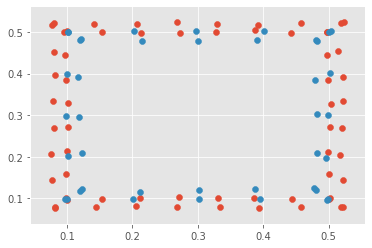

In [88]:
mm1, ss1 = model.predict(XX, 0)
mm2, ss2 = model.predict(XX, 1)

mm1 = mm1.reshape(x.shape)
mm2 = mm2.reshape(x.shape)

z = mm2.numpy()

# xyz = plt.pcolormesh(x, y, z, cmap="Greens", shading="gouraud", vmax=z.max(), vmin=z.min())
plt.scatter(x1.ravel(), y1.ravel())
plt.scatter(x2.ravel(), y2.ravel())
# plt.axis([x.min(), x.max(), y.min(), y.max()])
# plt.colorbar(xyz)
# plt.savefig('env1.png')
plt.show()

In [89]:
print("----- before learning -----")
print(model.task_params_to_psd())
model.learning(max_iter=5000)
print("----- after learning -----")
print(model.task_params_to_psd())


----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
task: tensor([[1.2758, 1.3448],
        [1.3448, 1.4444]])
sigma: tensor(-5.4071)
kernel: tensor([0.1239])
----- after learning -----
tensor([[1.2758, 1.3448],
        [1.3448, 1.4444]])


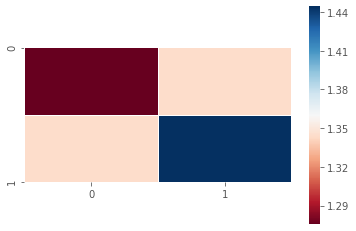

In [90]:
# 相関行列のヒートマップを描く
colormap = plt.cm.RdBu

sns.heatmap(model.task_params_to_psd().numpy(), linewidths=0.1, square=True, cmap=colormap, linecolor='white')
# plt.savefig('similarity.png')
plt.show()

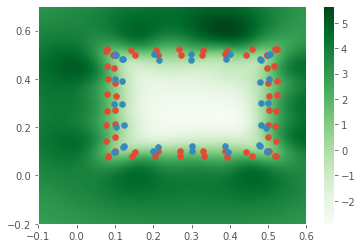

<IPython.core.display.Javascript object>


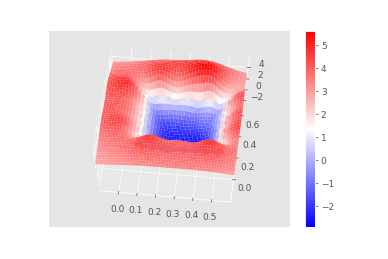

In [91]:
mm1, ss1 = model.predict(XX, 0)
mm2, ss2 = model.predict(XX, 1)

mm1 = mm1.reshape(x.shape)
mm2 = mm2.reshape(x.shape)

z = mm2.numpy()

xyz = plt.pcolormesh(x, y, z, cmap='Greens', shading="gouraud", vmax=z.max(), vmin=z.min())
plt.scatter(x1.ravel(), y1.ravel())
plt.scatter(x2.ravel(), y2.ravel())
plt.colorbar(xyz)
# plt.savefig('mtgpis.png')
plt.show()

%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.ravel(), y1.ravel(), np.array(Y1).ravel())
ax.scatter(x2.ravel(), y2.ravel(), np.array(Y2).ravel())

surf = ax.plot_surface(x, y, z, cmap='bwr', linewidth=0)
fig.colorbar(surf)
# plt.savefig('mtgpis_3d.png')
plt.show()

# sample1

In [255]:
N1 = 32
N2 = 20
rate = 0.01 # data scale
%matplotlib inline

### visual data

In [256]:
x1_0 = (np.concatenate([np.linspace(10, 50, N1//4), np.ones(N1//4)*50, np.linspace(50, 10, N1//4), np.ones(N1//4)*10]) + np.random.randn(N1) * 0.2) * rate
x1_1 = (np.concatenate([np.linspace(8, 52, N1//4), np.ones(N1//4)*52, np.linspace(52, 8, N1//4), np.ones(N1//4)*8]) + np.random.randn(N1) * 0.2) * rate
x1    = np.concatenate([x1_0, x1_1])[:, None]

y1_0 = (np.concatenate([np.ones(N1//4)*10, np.linspace(10, 50, N1//4), np.ones(N1//4)*50, np.linspace(50, 10, N1//4)]) + np.random.randn(N1) * 0.2) * rate
y1_1 = (np.concatenate([np.ones(N1//4)*8, np.linspace(8, 52, N1//4), np.ones(N1//4)*52, np.linspace(52, 8, N1//4)]) + np.random.randn(N1) * 0.2) * rate
y1    = np.concatenate([y1_0, y1_1])[:, None]

X1 = np.concatenate([x1,y1],1)
Y1 = np.concatenate([np.zeros(N1), np.ones(N1)])[:, None]
T1 = 0

### tacticle data

In [257]:
x2_0 = (np.concatenate([np.linspace(12, 48, N2//4), np.ones(N2//4)*48, np.linspace(48, 12, N2//4), np.ones(N2//4)*12]) + np.random.randn(N2) * 0.2) * rate
x2_1 = (np.concatenate([np.linspace(10, 50, N2//4), np.ones(N2//4)*50, np.linspace(50, 10, N2//4), np.ones(N2//4)*10]) + np.random.randn(N2) * 0.2) * rate
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.ones(N2//4)*12, np.linspace(12, 48, N2//4), np.ones(N2//4)*48, np.linspace(48, 12, N2//4)]) + np.random.randn(N2) * 0.2) * rate
y2_1 = (np.concatenate([np.ones(N2//4)*10, np.linspace(10, 50, N2//4), np.ones(N2//4)*50, np.linspace(50, 10, N2//4)]) + np.random.randn(N2) * 0.2) * rate
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2), np.ones(N2)])[:, None]
T2 = 1

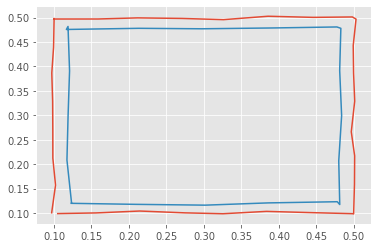

In [258]:
plt.plot(x1_0, y1_0)
plt.plot(x2_0, y2_0)
# plt.scatter(x1_1, y1_1)
plt.show()

In [259]:
def plot_all(model, kernel, x1, y1, x2, y2):
    print("----- before learning -----")
    print(model.task_params_to_psd())
    model.learning(max_iter=5000)
    print("----- after learning -----")
    print(model.task_params_to_psd())

    x   = np.linspace(-10, 70, 100)[:, None] * rate
    y   = np.linspace(-10, 70, 100)[:, None] * rate
    x,y = np.meshgrid(x, y)
    xx  = x.ravel()[:, None]
    yy  = y.ravel()[:, None]
    XX  = np.concatenate([xx, yy], 1)
    XX  = torch.from_numpy(XX).float()
    
    mm1, ss1 = model.predict(XX, 0)
    mm2, ss2 = model.predict(XX, 1)

    mm1 = mm1.reshape(x.shape)
    mm2 = mm2.reshape(x.shape)

    z = mm2.numpy()

    xyz = plt.pcolormesh(x, y, z, cmap='Greens', shading="gouraud", vmax=z.max(), vmin=z.min())
    plt.scatter(x1.ravel(), y1.ravel())
    plt.scatter(x2.ravel(), y2.ravel())
    plt.colorbar(xyz)
    # plt.savefig('mtgpis.png')
    plt.show()

    # %matplotlib notebook
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1.ravel(), y1.ravel(), np.array(Y1).ravel())
    ax.scatter(x2.ravel(), y2.ravel(), np.array(Y2).ravel())

    surf = ax.plot_surface(x, y, z, cmap='bwr', linewidth=0)
    fig.colorbar(surf)
    # plt.savefig('mtgpis_3d.png')
    plt.show()

### step1

In [260]:
x2_0 = (np.linspace(12, 48, N2//4)+ np.random.randn(N2//4) * 0.2) * rate
x2_1 = (np.linspace(10, 50, N2//4) + np.random.randn(N2//4) * 0.2) * rate
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.ones(N2//4)*12 + np.random.randn(N2//4) * 0.2) * rate
y2_1 = (np.ones(N2//4)*10 + np.random.randn(N2//4) * 0.2) * rate
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2//4), np.ones(N2//4)])[:, None]
T2 = 1

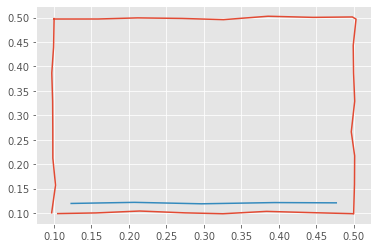

In [261]:
plt.plot(x1_0, y1_0)
plt.plot(x2_0, y2_0)
# plt.scatter(x1_1, y1_1)
plt.show()

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
task: tensor([[7.1831, 7.3796],
        [7.3796, 7.6530]])
sigma: tensor(-2.7318)
kernel: tensor([0.2503])
----- after learning -----
tensor([[7.1831, 7.3796],
        [7.3796, 7.6530]])


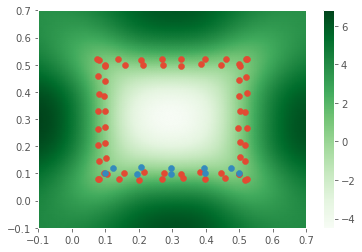

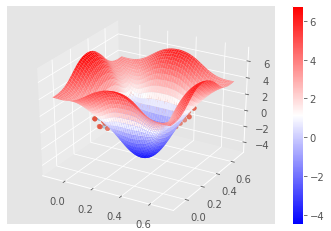

In [263]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

model = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
kernel = InverseMultiquadricKernelPytouch([0.01])
plot_all(model, kernel, x1,y1,x2,y2)

### step2

In [264]:
x2_0 = (np.concatenate([np.linspace(12, 48, N2//4), np.ones(N2//4)*48]) + np.random.randn(N2//2) * 0.2) * rate
x2_1 = (np.concatenate([np.linspace(10, 50, N2//4), np.ones(N2//4)*50]) + np.random.randn(N2//2) * 0.2) * rate
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.ones(N2//4)*12, np.linspace(12, 48, N2//4)]) + np.random.randn(N2//2) * 0.2) * rate
y2_1 = (np.concatenate([np.ones(N2//4)*10, np.linspace(10, 50, N2//4)]) + np.random.randn(N2//2) * 0.2) * rate
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2//2), np.ones(N2//2)])[:, None]
T2 = 1

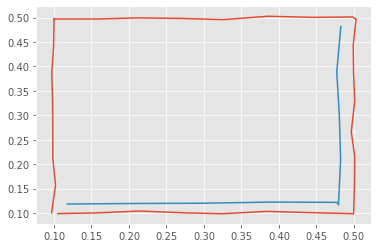

In [265]:
plt.plot(x1_0, y1_0)
plt.plot(x2_0, y2_0)
# plt.scatter(x1_1, y1_1)
plt.show()

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
task: tensor([[0.7800, 0.7945],
        [0.7945, 0.8369]])
sigma: tensor(-5.6917)
kernel: tensor([0.1066])
----- after learning -----
tensor([[0.7800, 0.7945],
        [0.7945, 0.8369]])


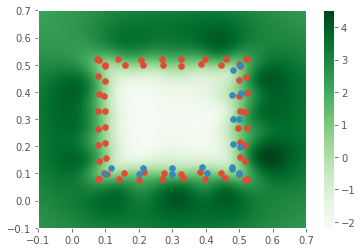

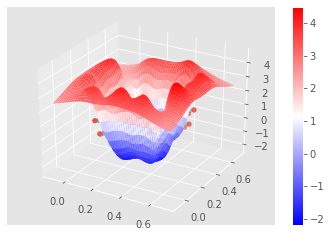

In [266]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.01])
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
plot_all(model, kernel, x1,y1,x2,y2)